# Import libraries

In [33]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scripts.utility import load_dataset, calculate_pearson, calculate_spearman
from scripts.plot import plot_numeric_histograms, plot_time_series, plot_correlation_heatmap,plot_scatter_plots, plot_wind_analysis, plot_bubble_chart

# Load Dataset

In [34]:
df = load_dataset('togo-dapaong_qc.csv')
df


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1      2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2      2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3      2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4      2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
525596 2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
525597 2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
525598 2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0   
525599 2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          1.1      0.4  227.6      1.1  977         0            0.0   24.7   
1          1.6      0.4  229.3      0.7  977         0            0.0   24.7   
2          1.4      0.3  228.5      2.9  977         0            0.0   24.7   
3          1.6      0.3  229.1      4.6  977         0            0.0   24.7   
4          1.6      0.4  227.5      1.6  977         0            0.0   24.7   
...        ...      ...    ...      ...  ...       ...            ...    ...   
525595     0.0      0.0    0.0      0.0  977         0            0.0   24.3   
525596     0.0      0.0    0.0      0.0  977         0            0.0   24.3   
525597     0.0      0.0    0.0      0.0  977         0            0.0   24.2   
525598     0.0      0.0    0.0      0.0  977         0            0.0   24.1   
525599     0.0      0.0    0.0      0.0  977         0            0.0   24.1   

        TModB  Comments  
0        24.4       NaN  
1        24.4       NaN  
2        24.4       NaN  
3        24.4       NaN  
4        24.4       NaN  
...       ...       ...  
525595   24.0       NaN  
525596   24.0       NaN  
525597   23.9       NaN  
525598   23.8       NaN  
525599   23.8       NaN  

[525600 rows x 19 columns]

# Pre-processing step

In [35]:
# List of columns to clean
columns_to_clean = ['GHI', 'DNI', 'DHI']

# Replace negative values with 0 in the specified columns
df[columns_to_clean] = df[columns_to_clean].clip(lower=0)

In [36]:
plot_numeric_histograms(df)

# Summary Stats & Nulls

In [37]:
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     231.718786     151.258469   
min              2021-10-25 00:01:00       0.000000       0.000000   
25%              2022-01-24 06:00:45       0.000000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     321.691953     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000       4.400000       4.300000      27.200000   
75%       215.700000     422.525000     411.000000      31.100000   
max       805.700000    1380.000000    1367.000000      41.400000   
std       156.520714     317.346938     307.932510       4.758023   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       55.013160       2.368093       3.229490       0.557740   
min         3.300000       0.000000       0.000000       0.000000   
25%        26.500000       1.400000       1.900000       0.400000   
50%        59.300000       2.200000       2.900000       0.500000   
75%        80.800000       3.200000       4.400000       0.700000   
max        99.800000      16.100000      23.100000       4.700000   
std        28.778732       1.462668       1.882565       0.268923   

                  WD        WDstdev             BP       Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      161.741845      10.559568     975.915242       0.000535   
min         0.000000       0.000000     968.000000       0.000000   
25%        74.800000       6.900000     975.000000       0.000000   
50%       199.100000      10.800000     976.000000       0.000000   
75%       233.500000      14.100000     977.000000       0.000000   
max       360.000000      86.900000     983.000000       1.000000   
std        91.877217       5.915490       2.153977       0.023116   

       Precipitation          TModA          TModB  Comments  
count  525600.000000  525600.000000  525600.000000       0.0  
mean        0.001382      32.444403      33.543330       NaN  
min         0.000000      13.100000      13.100000       NaN  
25%         0.000000      23.900000      23.600000       NaN  
50%         0.000000      28.400000      28.400000       NaN  
75%         0.000000      40.600000      43.000000       NaN  
max         2.300000      70.400000      94.600000       NaN  
std         0.026350      10.998334      12.769277       NaN

In [38]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [39]:
(df.isna().mean() * 100).sort_values(ascending=False)

Comments         100.0
WSstdev            0.0
TModB              0.0
TModA              0.0
Precipitation      0.0
Cleaning           0.0
BP                 0.0
WDstdev            0.0
WD                 0.0
Timestamp          0.0
GHI                0.0
WS                 0.0
RH                 0.0
Tamb               0.0
ModB               0.0
ModA               0.0
DHI                0.0
DNI                0.0
WSgust             0.0
dtype: float64

# Outlier Detection

In [40]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z = df[cols].apply(zscore)
(z.abs() > 3).sum()

GHI        314
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64

# Clean Data

In [41]:
df_clean = df.copy()
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())
df_clean.to_csv('togo_clean.csv', index=False)

# Time Series Charts

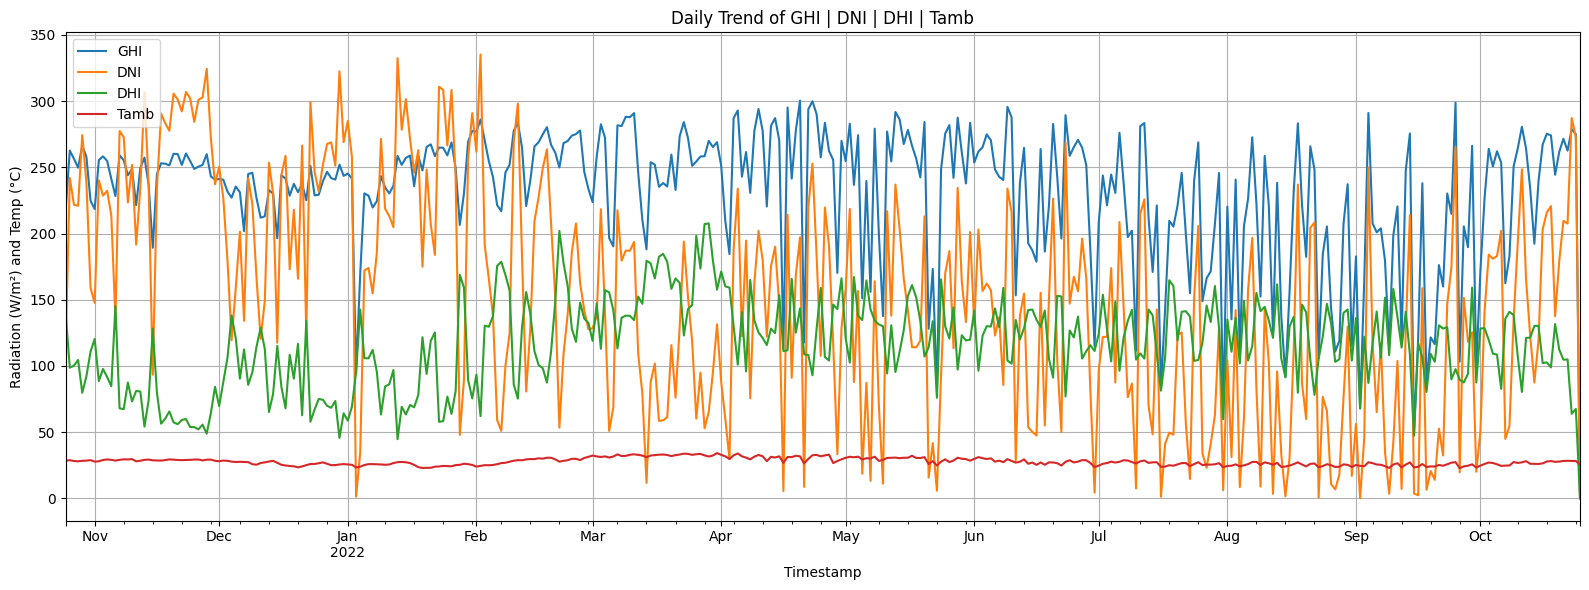

/home/samrawit/KAIM - 10 academy/week 0/solar-radiation-data-insights/scripts/plot.py:71: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df[cols].resample(freq).mean()


In [42]:

plot_time_series(
    df=df_clean,
    cols=['GHI', 'DNI', 'DHI', 'Tamb'],
    timestamp_col='Timestamp',
    y_label='Radiation (W/m²) and Temp (°C)',
    freq_title_map={
        'D': 'Daily',
        'M': 'Monthly'
    },
    freqs=['D', 'M'],
    figsize=(16, 6)
)

# Cleaning Impact

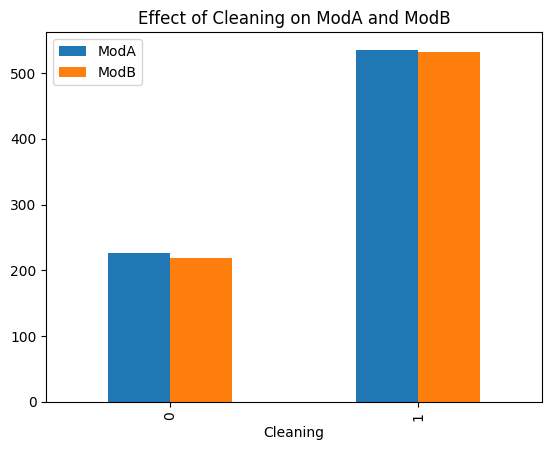

In [43]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on ModA and ModB')
plt.show()

# Correlation & Scatter Plots

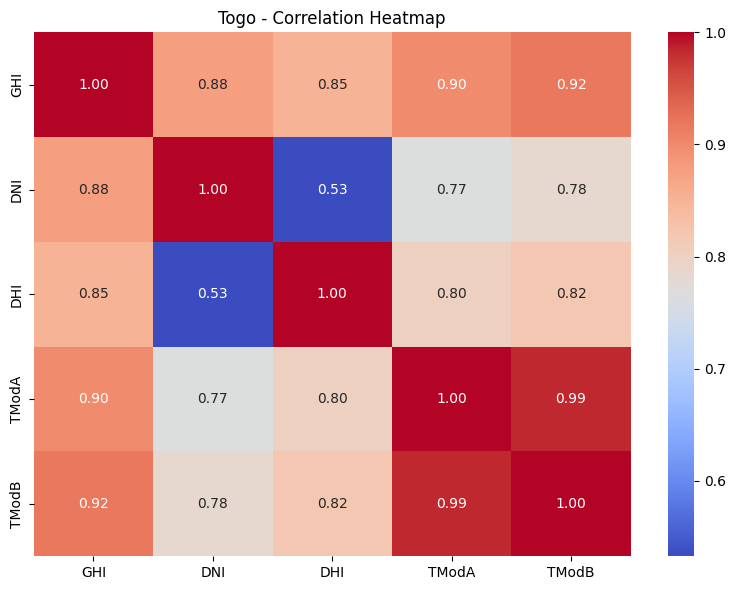

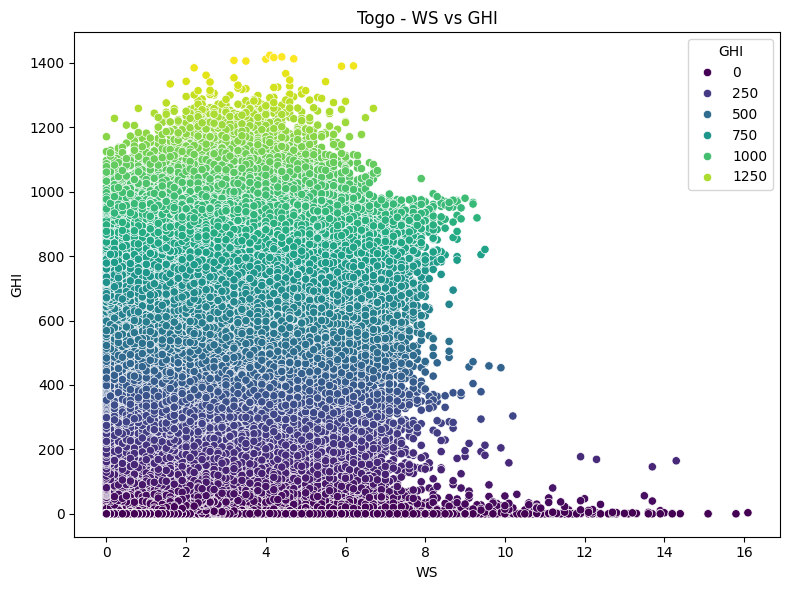

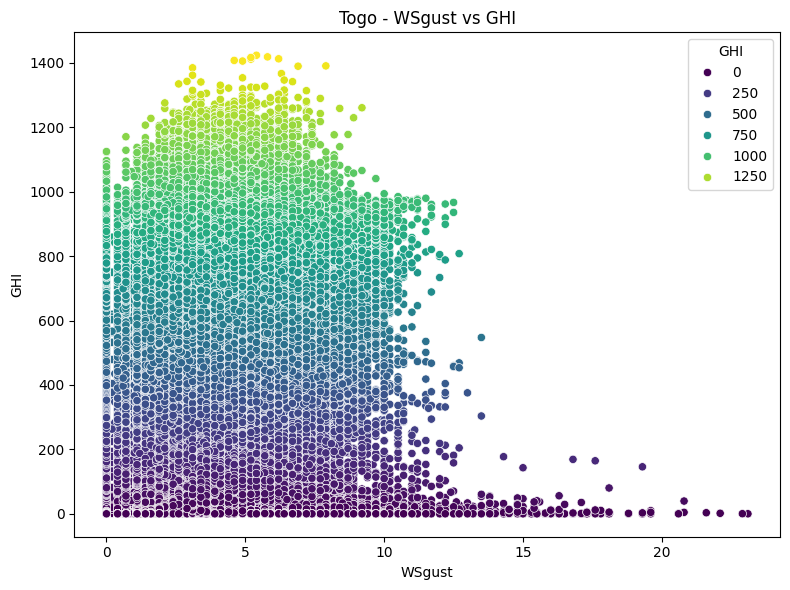

/home/samrawit/KAIM - 10 academy/week 0/solar-radiation-data-insights/scripts/plot.py:102: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/samrawit/anaconda3/envs/mltraining/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


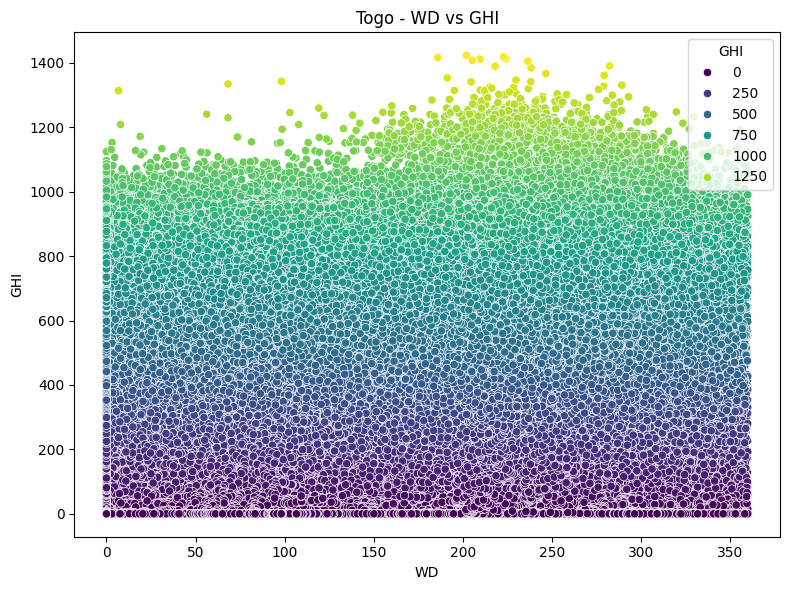

In [44]:
# Define parameters
heatmap_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
scatter_x_vars = ['WS', 'WSgust', 'WD']

# For Togo
plot_correlation_heatmap(df_clean, heatmap_columns, region_name='Togo')
plot_scatter_plots(df_clean, scatter_x_vars, region_name='Togo')

# Wind + Histograms

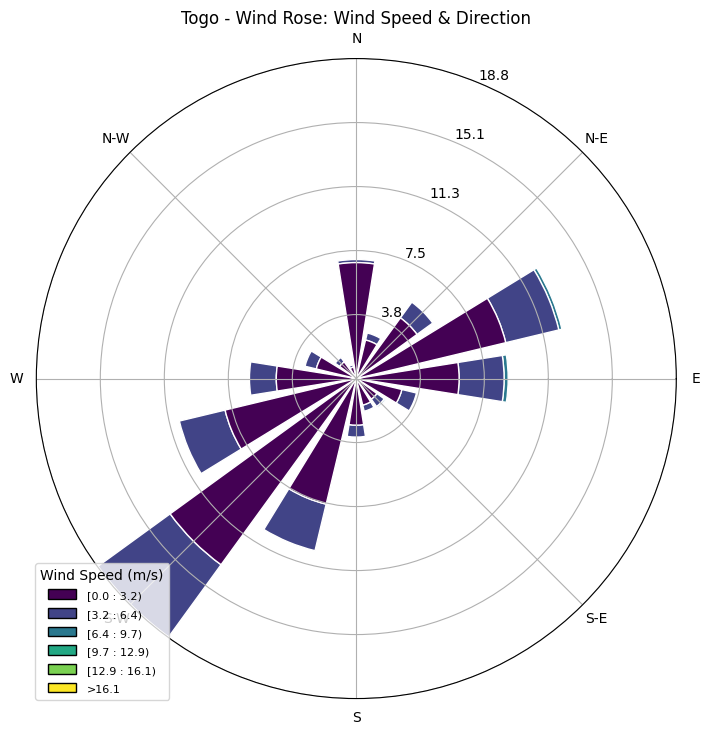

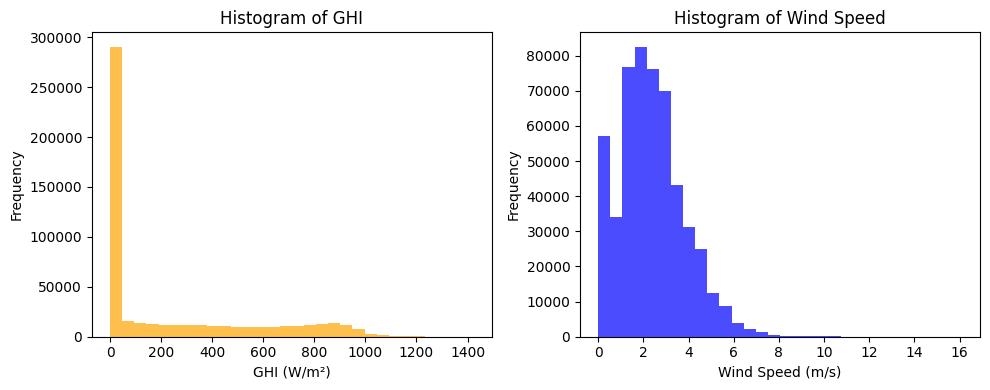

In [45]:
plot_wind_analysis(df_clean, region_name="Togo")

# Temperature vs RH

In [46]:
plot_scatter_plots(df, x_columns=['RH', 'Tamb'], y_column='GHI', region_name='Togo')

# Calculate Pearson correlation
pearson_temp_rh = calculate_pearson(df, 'Tamb', 'RH')

# Calculate Spearman correlation
spearman_ghi_rh = calculate_spearman(df, 'GHI', 'RH')

/home/samrawit/KAIM - 10 academy/week 0/solar-radiation-data-insights/scripts/plot.py:102: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/samrawit/anaconda3/envs/mltraining/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Pearson correlation between Tamb and RH: -0.400 (p=0.000e+00)
Spearman correlation between GHI and RH: -0.248 (p=0.000e+00)


### Bubble Chart

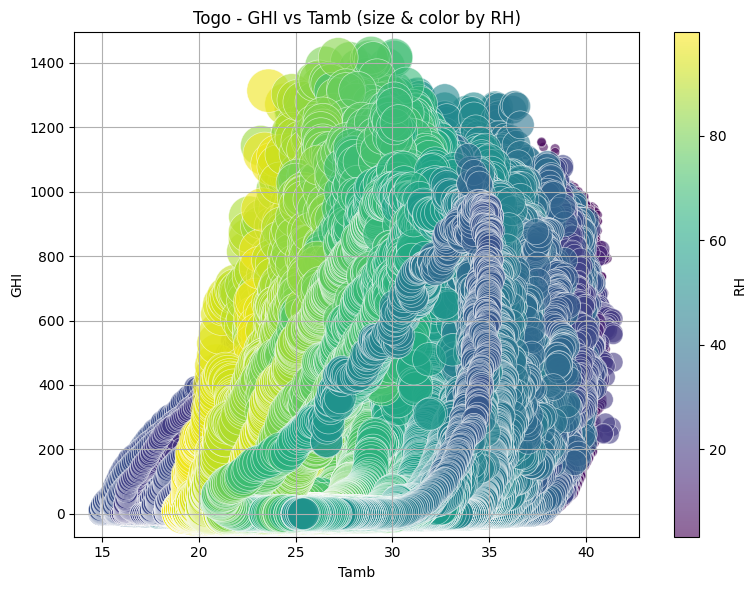

In [47]:
plot_bubble_chart(df, x_col='Tamb', y_col='GHI', size_col='RH', region_name='Togo')
